#Neural Network - MNIST
https://github.com/ArenaHernandez/MNIST-Handwritten-Digit-Recognition.git

In [177]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [192]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [193]:
len(X_train)

60000

In [194]:
X_train.shape

(60000, 28, 28)

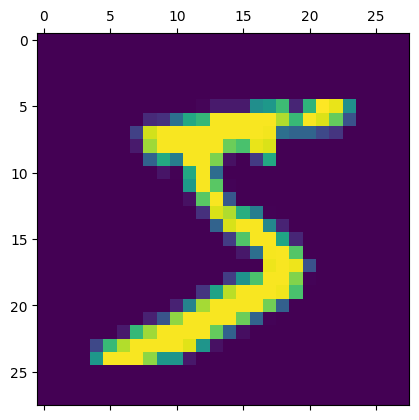

In [195]:
plt.matshow(X_train[0])

In [196]:
y_train[0]

5

##Scale the data

In [197]:
X_train = X_train / 255.0
X_test = X_test / 255.0

##Flatten the dataset using the reshape function

In [198]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [199]:
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [201]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [202]:
model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(784,), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=50, validation_split=0.2, batch_size=128, verbose=1)

Epoch 1/50
375/375 [==============================] - 7s 14ms/step - loss: 0.4442 - accuracy: 0.8616 - val_loss: 0.1612 - val_accuracy: 0.9522
Epoch 2/50
375/375 [==============================] - 9s 25ms/step - loss: 0.2072 - accuracy: 0.9373 - val_loss: 0.1136 - val_accuracy: 0.9667
Epoch 3/50
375/375 [==============================] - 5s 12ms/step - loss: 0.1658 - accuracy: 0.9497 - val_loss: 0.1065 - val_accuracy: 0.9678
Epoch 4/50
375/375 [==============================] - 6s 15ms/step - loss: 0.1386 - accuracy: 0.9573 - val_loss: 0.0915 - val_accuracy: 0.9721
Epoch 5/50
375/375 [==============================] - 4s 12ms/step - loss: 0.1286 - accuracy: 0.9601 - val_loss: 0.0879 - val_accuracy: 0.9732
Epoch 6/50
375/375 [==============================] - 5s 15ms/step - loss: 0.1134 - accuracy: 0.9643 - val_loss: 0.0880 - val_accuracy: 0.9733
Epoch 7/50
375/375 [==============================] - 5s 12ms/step - loss: 0.1088 - accuracy: 0.9657 - val_loss: 0.0842 - val_accuracy: 0.9738

In [203]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0681 - accuracy: 0.9830


[0.06812811642885208, 0.9829999804496765]

In [204]:
y_predicted = model.predict(X_test_flattened)
print(y_predicted[10])
print(np.argmax(y_predicted[0]))

313/313 [==============================] - 1s 3ms/step
[9.9999994e-01 1.0168410e-11 4.2610089e-09 4.1465536e-11 2.3230794e-11
 1.7090282e-11 5.5588449e-09 5.9911121e-12 1.5960764e-11 4.6675253e-10]
7


In [205]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]

Text(95.72222222222221, 0.5, 'Truth')

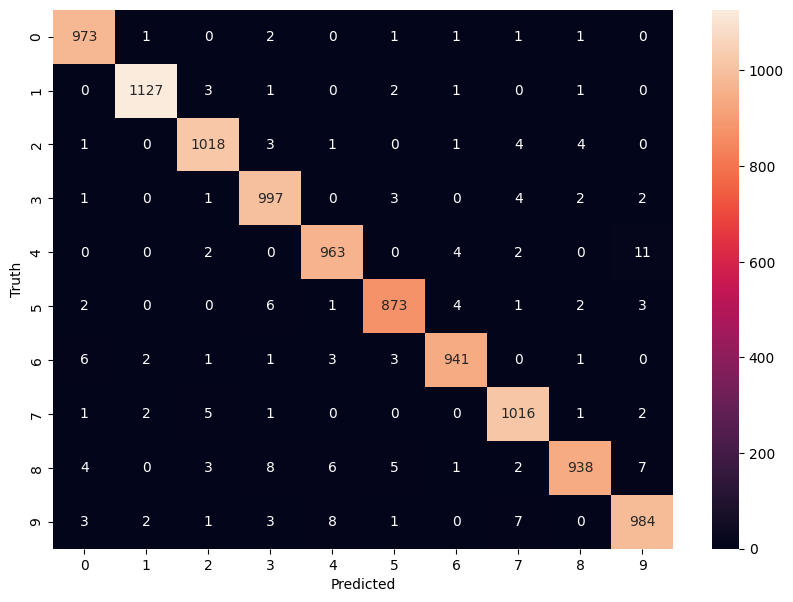

In [206]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')